### Thermal Parser Quick Start

Install the package if not installed yet:

In [1]:
! uv sync

Resolved 117 packages in 0.67ms
Audited 110 packages in 0.79ms


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thermal_parser import Thermal

Use `thermal.parse` method for bare JPG to numpy conversion inside code:

In [ ]:
thermal = Thermal(dtype=np.float32) # creating the parser object with target dtype
temperature = thermal.parse(filepath_image='/home/al/work/thermal_parser/images/DJI_H20T.jpg')
assert isinstance(temperature, np.ndarray)

Use `thermal.process` method for converting JPG to tiff/npy (saving on filesystem) + exif moving:

In [4]:
temperature = thermal.process(input_path='images/DJI_H20T.jpg', move_exif=True)

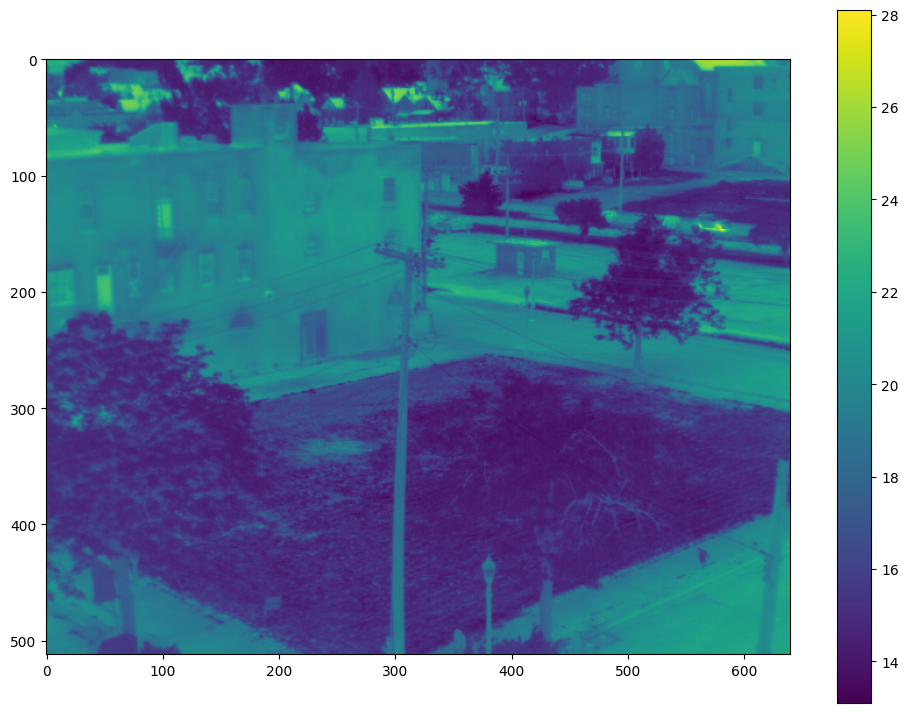

In [5]:
plt.figure(figsize=(12, 9))
plt.imshow(temperature)
plt.colorbar()
%clear

Check exif moving:  
The output is a bit differ because of JPG and TIFF have some different flags.

In [6]:
! tail -n 10 <(exiftool 'images/DJI_H20T.jpg')

GPS Altitude                    : 221.4 m Above Sea Level
GPS Latitude                    : 40 deg 33' 49.61" N
GPS Longitude                   : 79 deg 45' 53.87" W
Preview Image                   : (Binary data 370822 bytes, use -b option to extract)
Circle Of Confusion             : 0.007 mm
Depth Of Field                  : 1.99 m (4.20 - 6.18 m)
Field Of View                   : 34.5 deg
Focal Length                    : 13.5 mm (35 mm equivalent: 58.0 mm)
GPS Position                    : 40 deg 33' 49.61" N, 79 deg 45' 53.87" W
Hyperfocal Distance             : 26.06 m


In [7]:
! tail -n 10 <(exiftool 'images/DJI_H20T.tiff')

Megapixels                      : 0.328
Scale Factor To 35 mm Equivalent: 4.3
GPS Altitude                    : 221.4 m Above Sea Level
GPS Latitude                    : 40 deg 33' 49.61" N
GPS Longitude                   : 79 deg 45' 53.87" W
Circle Of Confusion             : 0.007 mm
Field Of View                   : 34.5 deg
Focal Length                    : 13.5 mm (35 mm equivalent: 58.0 mm)
GPS Position                    : 40 deg 33' 49.61" N, 79 deg 45' 53.87" W
Hyperfocal Distance             : 26.06 m


Finally, the cli interface usage:

In [8]:
! uv run thermal-parser --help

Usage: thermal-parser [OPTIONS]

  Process thermal images from FLIR/DJI cameras.

  INPUT_PATH: Path to a single image file or directory of images.

Options:
  --input-path PATH               Input directory with files / single JPG
                                  [required]
  -o, --output-dir PATH           Output directory (defaults to input
                                  directory or {input}_processed/)
  -f, --output-format [tiff|npy]  Output format: tiff or npy
  -w, --num-workers INTEGER       Number of parallel workers for batch
                                  processing
  --move-exif / --no-move-exif    Transfer EXIF metadata to output files
                                  (default: enabled)
  -d, --dtype [float32|int16]     Data type for temperature values
  --help                          Show this message and exit.


In [11]:
! uv run thermal-parser --input-path images/M30T/ --move-exif

Processed 10 files to images/M30T_processed
